# <font color=red>Bike Sharing Assignment</font>
##### <font color=red>By: Sakshi Shrivastava </font>

<font color=blue><b>Problem Statement:</b></font> A US bike-sharing provider BoomBikes has recently suffered considerable dips in their
revenues. They have contracted a consulting company to understand the factors on which
the demand for these shared bikes depends. Specifically, they want to understand the
factors affecting the demand for these shared bikes in the American market. The company
wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
<br>
<br>

<font color=blue>__Business Obbjective:__ </font>
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

- <b>Importing the required libraries</b>

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
import calendar

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

- <b>Loading the <font color=blue>day data</font> file into bike_rental_df named dataframe.</b>

In [2]:
bike_rental_df =  pd.read_csv("day.csv", index_col = 0)

> # <font color=green>Step 1: Data Understanding and Cleaning</font>

__Inspect the various aspects of the housing dataframe__

In [3]:
# Check the head of the dataset
bike_rental_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Checking number of rows and columns in dataset
bike_rental_df.shape

(730, 15)

- Initially dataset contains 15 columns and 730 rows.

In [5]:
#Checking datatypes of variables
bike_rental_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [6]:
bike_rental_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


- __Finding percentage(%) of missing values in each column__

In [7]:
missing_values = round(100*(bike_rental_df.isnull().sum()/len(bike_rental_df.index)), 2)
missing_values.loc[missing_values > 0]

Series([], dtype: float64)

- There are no missing values in the dataframe

__Dropping the unnecessary 3 variables after studying the data dictionary:__
- dteday: Dropping it as it represents the date on which the bike was rented.
- 'casual' and 'registered' : These 2 represents count of casual and registered users and the sum of these 2 is our target variable 'cnt'.Thus, we can get rid of these columns.

In [8]:
bike_rental_df=bike_rental_df.drop(['dteday', 'casual','registered'], axis = 1) 

- __Converting the dtype of these columns to categorical__

In [9]:
category_features = ['season', 'holiday', 'mnth', 'yr', 'weekday', 'workingday', 'weathersit']
bike_rental_df[category_features].info() #initially these are int types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   season      730 non-null    int64
 1   holiday     730 non-null    int64
 2   mnth        730 non-null    int64
 3   yr          730 non-null    int64
 4   weekday     730 non-null    int64
 5   workingday  730 non-null    int64
 6   weathersit  730 non-null    int64
dtypes: int64(7)
memory usage: 45.6 KB


In [10]:
bike_rental_df[category_features]=bike_rental_df[category_features].apply(lambda x: x.astype('category'))

In [11]:
bike_rental_df[category_features].info() #converted to categorical type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   holiday     730 non-null    category
 2   mnth        730 non-null    category
 3   yr          730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
dtypes: category(7)
memory usage: 12.0 KB


__Mapping values of categorical variables to their exact values.__

In [12]:
bike_rental_df['yr'] = np.where(bike_rental_df['yr']==1, '2019', '2018')

In [13]:
bike_rental_df['holiday'] = np.where(bike_rental_df['holiday']==1, 'holiday', 'not_a_holiday')

In [14]:
bike_rental_df['workingday'] = np.where(bike_rental_df['workingday']==1, 'workingday', 'not_a_workingday')

In [15]:
bike_rental_df['season'] = np.where((bike_rental_df.season == 1) , 'spring',   #when... then
                 np.where((bike_rental_df.season == 2), 'summer',  #when... then
                  np.where((bike_rental_df.season == 3), 'fall',  #when... then
                    'winter'))) 

In [16]:
bike_rental_df['mnth'] = bike_rental_df['mnth'].apply(lambda x: calendar.month_name[x])

In [17]:
bike_rental_df['weekday'] = bike_rental_df['weekday'].apply(lambda x: calendar.day_name[x])

In [18]:
bike_rental_df['weathersit'] = np.where((bike_rental_df.weathersit == 1) , 'clear',   #when... then
                 np.where((bike_rental_df.weathersit == 2), 'mist',  #when... then
                  np.where((bike_rental_df.weathersit == 3), 'light',  #when... then
                    'heavy'))) 

__Describing numerical variables__

In [19]:
number_features = ['temp', 'atemp', 'hum', 'windspeed']

In [20]:
print(bike_rental_df[number_features].describe())

             temp       atemp         hum   windspeed
count  730.000000  730.000000  730.000000  730.000000
mean    20.319259   23.726322   62.765175   12.763620
std      7.506729    8.150308   14.237589    5.195841
min      2.424346    3.953480    0.000000    1.500244
25%     13.811885   16.889713   52.000000    9.041650
50%     20.465826   24.368225   62.625000   12.125325
75%     26.880615   30.445775   72.989575   15.625589
max     35.328347   42.044800   97.250000   34.000021


__Description of categorical variables__

In [21]:
print(bike_rental_df[category_features].describe())

       season        holiday      mnth    yr weekday  workingday weathersit
count     730            730       730   730     730         730        730
unique      4              2        12     2       7           2          3
top      fall  not_a_holiday  December  2019  Sunday  workingday      clear
freq      188            709        62   365     105         499        463


In [22]:
bike_rental_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,spring,2018,January,not_a_holiday,Sunday,not_a_workingday,mist,14.110847,18.18125,80.5833,10.749882,985
2,spring,2018,January,not_a_holiday,Monday,not_a_workingday,mist,14.902598,17.68695,69.6087,16.652113,801
3,spring,2018,January,not_a_holiday,Tuesday,workingday,clear,8.050924,9.47025,43.7273,16.636703,1349
4,spring,2018,January,not_a_holiday,Wednesday,workingday,clear,8.200000,10.60610,59.0435,10.739832,1562
5,spring,2018,January,not_a_holiday,Thursday,workingday,clear,9.305237,11.46350,43.6957,12.522300,1600


> # <font color=green>Step 2: Data Visualisation</font>

## Univariate Analysis

__Box Plots of Numerical Variables__

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Wind Speed'),
 Text(0.5, 1.0, 'Distribution of Windspeed')]

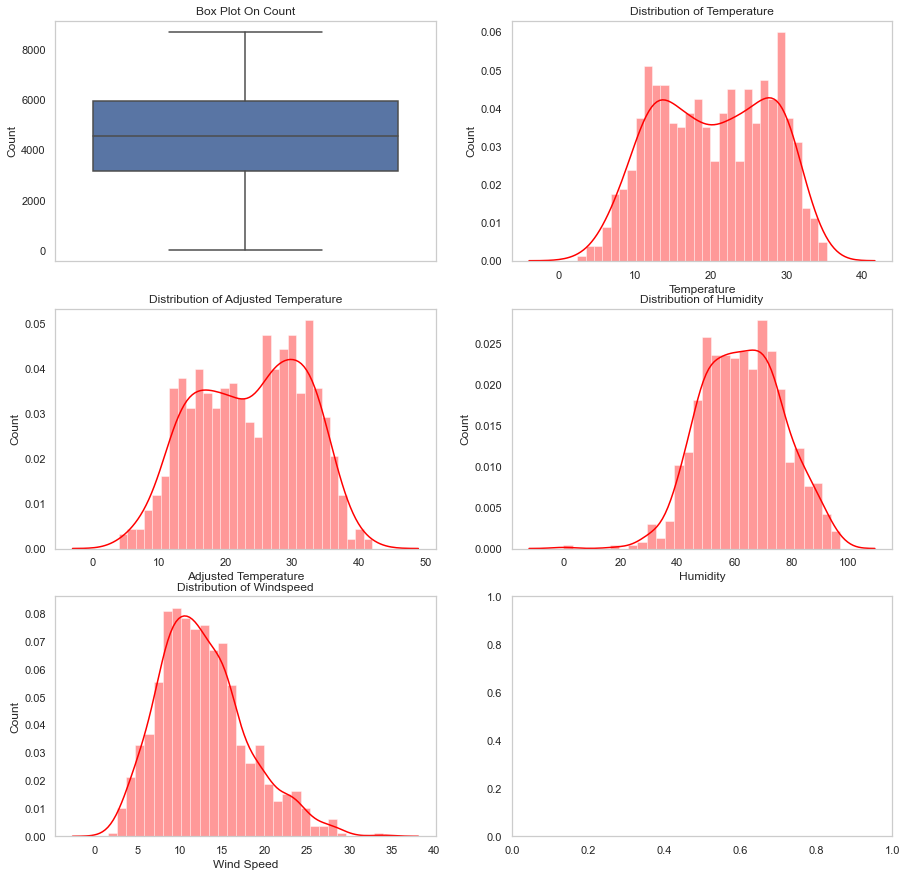

In [23]:
sns.set(font_scale=1.0)
sns.set_style("whitegrid", {'axes.grid' : False})
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 15)
sns.boxplot(data=bike_rental_df,y="cnt",orient="v",ax=axes[0][0])
sns.set_style('whitegrid') 

sns.distplot(bike_rental_df['temp'], kde = True, color ='red', bins = 30,ax=axes[0][1]) 
sns.distplot(bike_rental_df['atemp'], kde = True, color ='red', bins = 30,ax=axes[1][0]) 
sns.distplot(bike_rental_df['hum'], kde = True, color ='red', bins = 30,ax=axes[1][1]) 
sns.distplot(bike_rental_df['windspeed'], kde = True, color ='red', bins = 30,ax=axes[2][0]) 

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Temperature', ylabel='Count',title="Distribution of Temperature")
axes[1][0].set(xlabel='Adjusted Temperature', ylabel='Count',title="Distribution of Adjusted Temperature")
axes[1][1].set(xlabel='Humidity', ylabel='Count',title="Distribution of Humidity")
axes[2][0].set(xlabel='Wind Speed', ylabel='Count',title="Distribution of Windspeed")


- Humidity is almost normally distribute.Thus, it may not affect the target variable.
- When windspeed is low people tend to rent more bikes.
- Temperature and adjusted temperature may also affect the target variable.

__Categorical Bar Plots__

In [24]:
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,size = 20)                      # Vertically align label differently for
                                        # positive and negative values.
        

In [25]:
def categoricalBarPlots(df, arr):
    rows = int(len(arr))
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).cnt.count().plot.bar(color=sns.color_palette('husl', 16))
        showLabels(ax)
        ax.xaxis.label.set_size(20)
        ax.tick_params(axis='both', which='major', labelsize=21,rotation=0)
        sns.set_style("whitegrid", {'axes.grid' : False})
    plt.tight_layout()

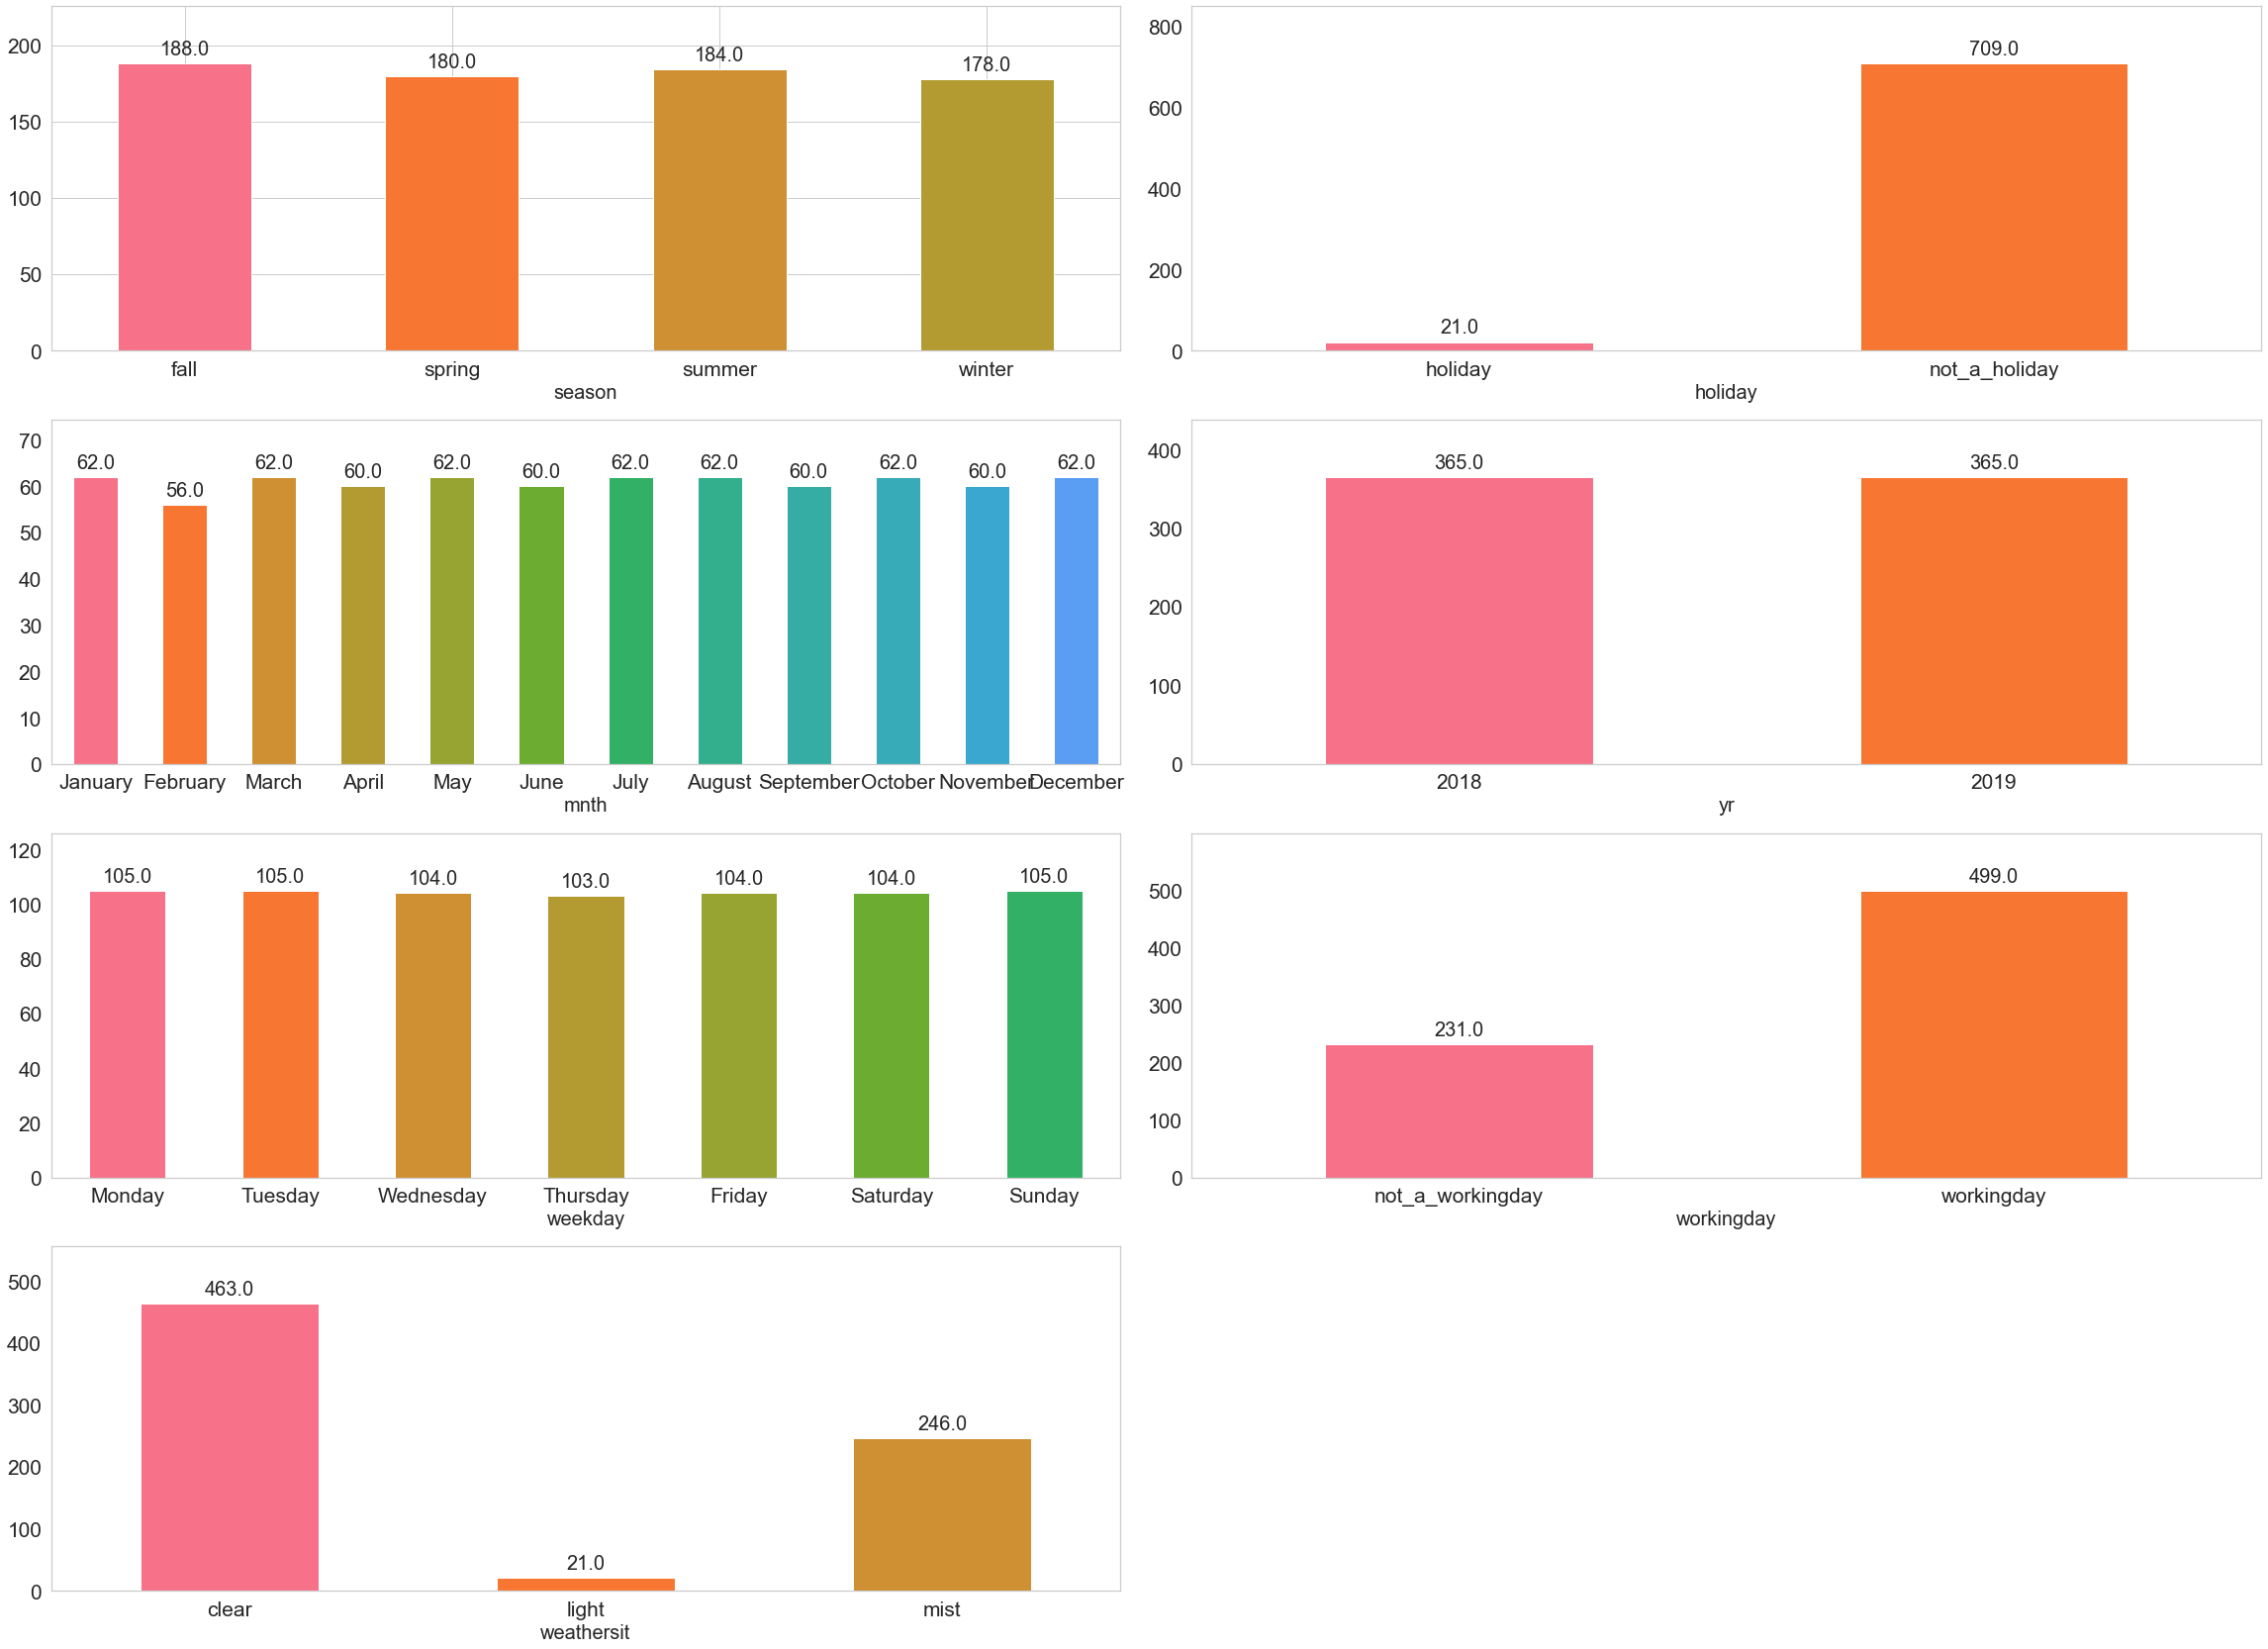

In [26]:
plt.figure(figsize=(32,40))

categoricalBarPlots(bike_rental_df, category_features)

- People rent bikes more in fall and summer followed by spring and winter
- On weekdays most of the people rent bike
- Number of people renting bike is almost same in all the months.
- Count across year is same which is basically no. of days.
- Distribution is also same for weekdays.
- People tend to rent bike more on a working day.
- Majority of people rent bike in clear weather followed by misty weather and light weather.

__Checking outliers in `windspeed` and `hum`__

{'whiskers': [<matplotlib.lines.Line2D at 0x28c707bac50>,
 'caps': [<matplotlib.lines.Line2D at 0x28c707c5400>,
 'boxes': [<matplotlib.lines.Line2D at 0x28c707baac8>],
 'medians': [<matplotlib.lines.Line2D at 0x28c707c5b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x28c707c5f28>],
 'means': []}

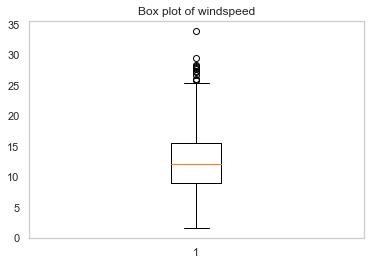

In [27]:
%matplotlib inline
plt.title('Box plot of windspeed')
plt.boxplot(bike_rental_df['windspeed'])

{'whiskers': [<matplotlib.lines.Line2D at 0x28c70823438>,
 'caps': [<matplotlib.lines.Line2D at 0x28c70823ba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x28c708232b0>],
 'medians': [<matplotlib.lines.Line2D at 0x28c7082d358>],
 'fliers': [<matplotlib.lines.Line2D at 0x28c7082d6d8>],
 'means': []}

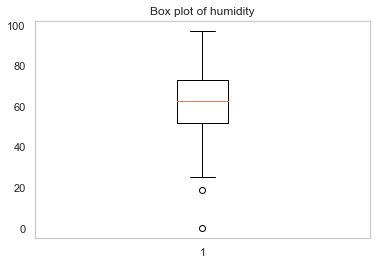

In [28]:
%matplotlib inline
plt.title('Box plot of humidity')
plt.boxplot(bike_rental_df['hum'])

- `hum` and `windspeed` have outliers present in data which will be handled by standardised scaling as it is less sensitive to outliers compared to minmax scaling.


## Bivariate Analysis

Let's make a pairplot of all the numeric variables

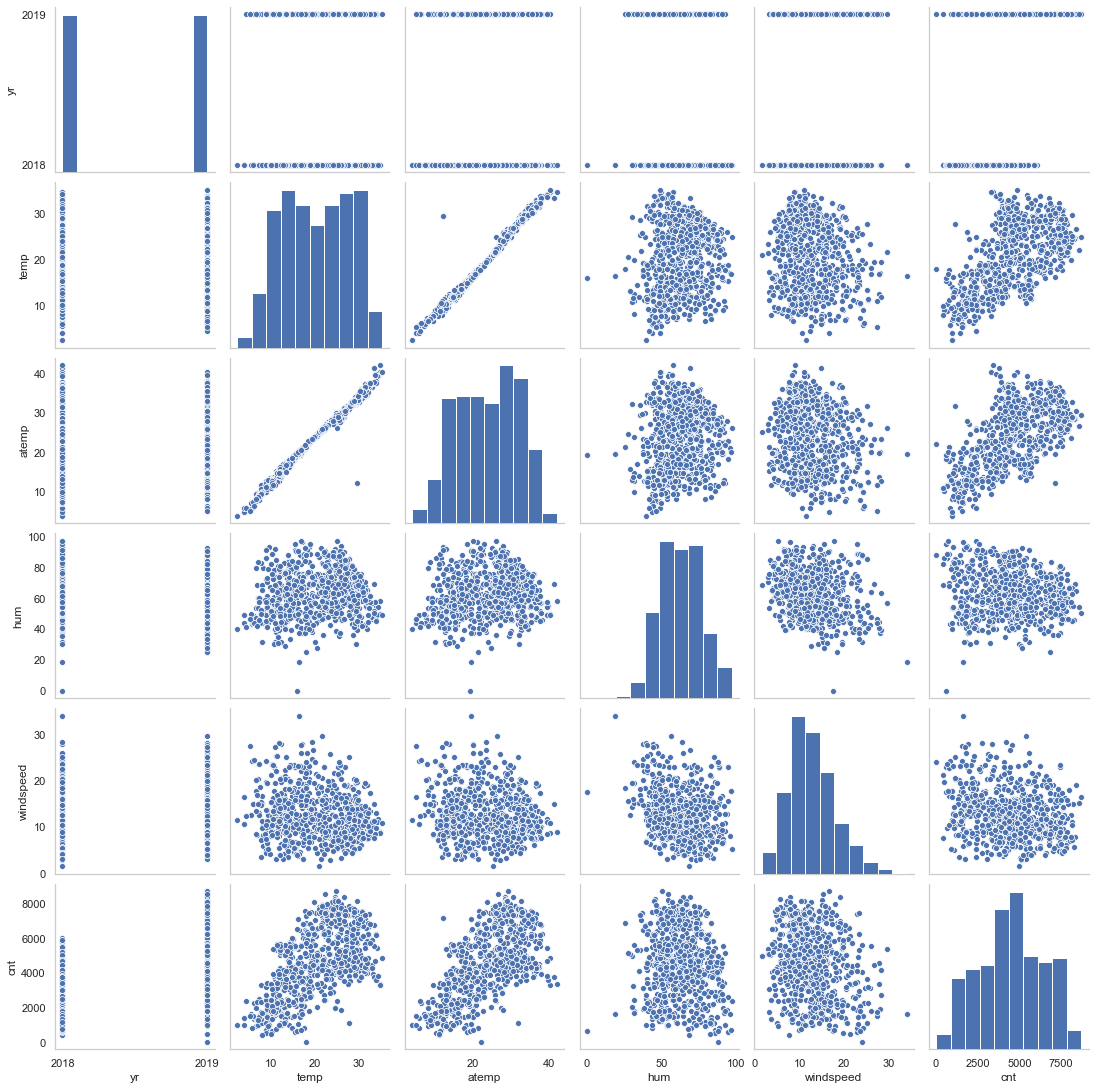

In [29]:
sns.pairplot(bike_rental_df)
plt.show()

- From the pairplot we can infer that there is strong correlation between temp and atemp.
- Also, temp and atemp have high correlation with target variable 'cnt'.

__Dropping temp variable as atemp is the temperature which we feels like.__

In [30]:
bike_rental_df = bike_rental_df.drop(["temp"], axis = 1)

#### Visualising Categorical Variables with Target Variable

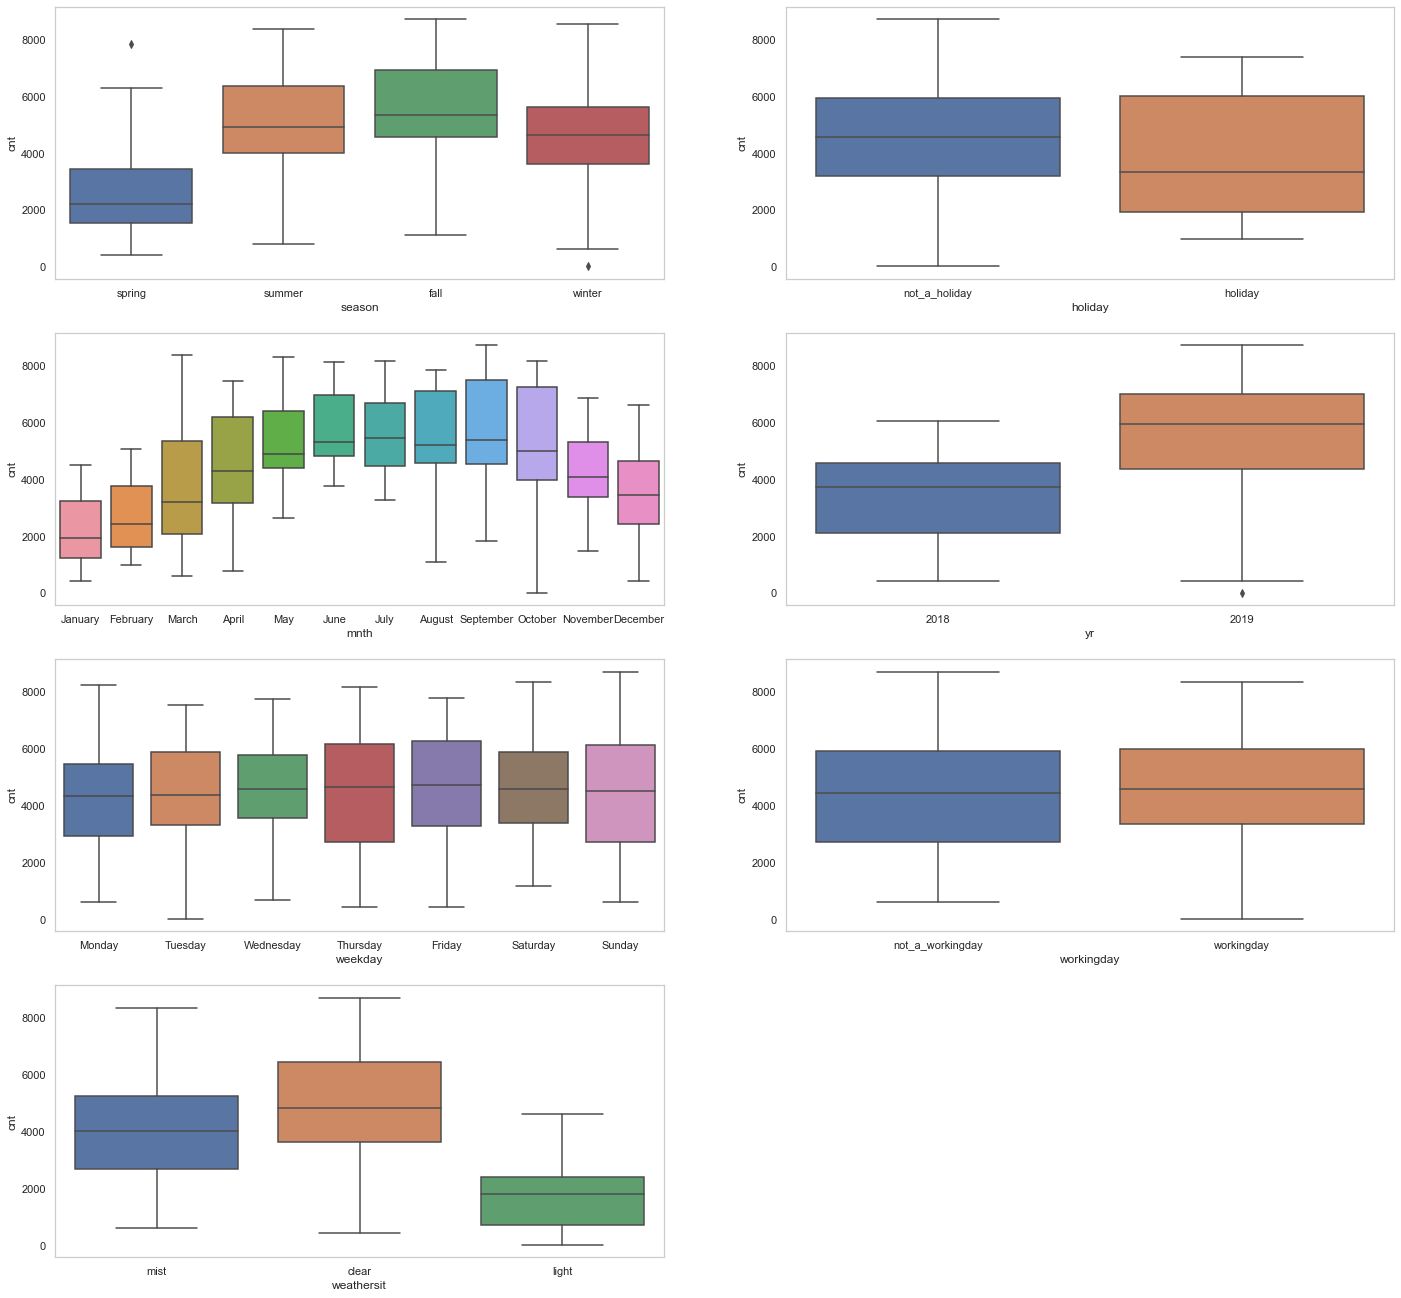

In [31]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(24, 23))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_rental_df)
plt.subplot(4,2,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_rental_df)
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_rental_df)
plt.subplot(4,2,4)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_rental_df)
plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_rental_df)
plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_rental_df)
plt.subplot(4,2,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_rental_df)
plt.show()

- season: fall and summer cover maximum variance followed by winter and spring.
- holiday: maximum variance is covered by non-holiday days.
- mnth: The median starts increasing from January till July and then starts to decrease
- yr(year): more bikes were rented in 2019 than 2018.
- weekday: medians of weekdays lie at approximately equal levels.
- workingday: more people rent bikes on working days.
- weathersit: most bikes were booked on clear weather days followed by mist and then least in light/rain.

> # <font color=green>Step 3: Data Preparation</font>

__Creating Dummy Variables for all the categorical features.__

In [32]:
dummy = pd.get_dummies(bike_rental_df[category_features], drop_first = True)

In [33]:
# Check what the dataset 'dummy' looks like
dummy.head()

,season_spring,season_summer,season_winter,holiday_not_a_holiday,mnth_February,mnth_March,mnth_April,mnth_May,mnth_June,mnth_July,...,yr_2019,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,weekday_Sunday,workingday_workingday,weathersit_light,weathersit_mist
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [34]:
# Add the results to the original bike_rental_df dataframe
bike_rental_df = pd.concat([bike_rental_df, dummy], axis = 1)

In [35]:
# Now let's see the head of our dataframe.
bike_rental_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,yr_2019,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,weekday_Sunday,workingday_workingday,weathersit_light,weathersit_mist
instant,,,,,,,,,,,,,,,,,,,,,
1,spring,2018,January,not_a_holiday,Sunday,not_a_workingday,mist,18.18125,80.5833,10.749882,...,0,0,0,0,0,0,1,0,0,1
2,spring,2018,January,not_a_holiday,Monday,not_a_workingday,mist,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,0,0,0,1
3,spring,2018,January,not_a_holiday,Tuesday,workingday,clear,9.47025,43.7273,16.636703,...,0,1,0,0,0,0,0,1,0,0
4,spring,2018,January,not_a_holiday,Wednesday,workingday,clear,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,1,0,0
5,spring,2018,January,not_a_holiday,Thursday,workingday,clear,11.46350,43.6957,12.522300,...,0,0,0,1,0,0,0,1,0,0


__Drop 'category_features' columns as we have created the dummies for them__

In [36]:
bike_rental_df.drop(category_features, axis = 1, inplace = True)

In [37]:
bike_rental_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   atemp                  730 non-null    float64
 1   hum                    730 non-null    float64
 2   windspeed              730 non-null    float64
 3   cnt                    730 non-null    int64  
 4   season_spring          730 non-null    uint8  
 5   season_summer          730 non-null    uint8  
 6   season_winter          730 non-null    uint8  
 7   holiday_not_a_holiday  730 non-null    uint8  
 8   mnth_February          730 non-null    uint8  
 9   mnth_March             730 non-null    uint8  
 10  mnth_April             730 non-null    uint8  
 11  mnth_May               730 non-null    uint8  
 12  mnth_June              730 non-null    uint8  
 13  mnth_July              730 non-null    uint8  
 14  mnth_August            730 non-null    uint8  
 15  mnth_S

__Checking the head of our final dataframe__

In [38]:
bike_rental_df.head()

,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,holiday_not_a_holiday,mnth_February,mnth_March,...,yr_2019,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,weekday_Sunday,workingday_workingday,weathersit_light,weathersit_mist
instant,,,,,,,,,,,,,,,,,,,,,
1,18.18125,80.5833,10.749882,985,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,17.68695,69.6087,16.652113,801,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,10.60610,59.0435,10.739832,1562,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
5,11.46350,43.6957,12.522300,1600,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


## Splitting the Data into Training and Testing Sets


In [39]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_rental_df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

- We will use Standardisation (mean-0, sigma-1) scaling as it is not sensitive to outliers and our dataset have outliers present in it.

In [40]:
#create object
scaler = StandardScaler()
# Apply scaler() to all the numerical columns
num_vars =['cnt', 'atemp', 'hum', 'windspeed']

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [41]:
df_train.head()

,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,holiday_not_a_holiday,mnth_February,mnth_March,...,yr_2019,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,weekday_Sunday,workingday_workingday,weathersit_light,weathersit_mist
instant,,,,,,,,,,,,,,,,,,,,,
654,-0.055878,-0.514725,-0.117752,1.562685,0,0,1,1,0,0,...,1,0,1,0,0,0,0,1,0,0
577,1.194106,0.516433,-0.330615,1.399629,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
427,-0.348834,-0.069854,-0.385694,-0.215554,1,0,0,1,0,1,...,1,0,0,0,0,0,1,0,0,1
729,-1.473492,-1.045032,2.018143,-1.379511,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
483,-0.571474,-1.000840,-0.779889,-0.136589,0,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1


In [42]:
df_train.describe()

,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,holiday_not_a_holiday,mnth_February,mnth_March,...,yr_2019,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,weekday_Sunday,workingday_workingday,weathersit_light,weathersit_mist
count,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,4.231909e-16,-3.831358e-16,-2.542628e-16,-5.224579e-17,0.243137,0.245098,0.24902,0.974510,0.066667,0.098039,...,0.507843,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.676471,0.029412,0.343137
std,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,0.429398,0.430568,0.43287,0.157763,0.249689,0.297660,...,0.500429,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.468282,0.169124,0.475223
min,-2.417741e+00,-4.462565e+00,-1.890981e+00,-2.289141e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.526058e-01,-7.666192e-01,-7.167878e-01,-7.006213e-01,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.514277e-02,2.294988e-02,-1.415145e-01,2.236523e-02,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,8.269866e-01,7.167702e-01,5.522525e-01,7.625291e-01,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,2.295305e+00,2.399023e+00,4.004188e+00,2.167738e+00,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


__Let's check the correlation coefficients to see which variables are highly correlated__

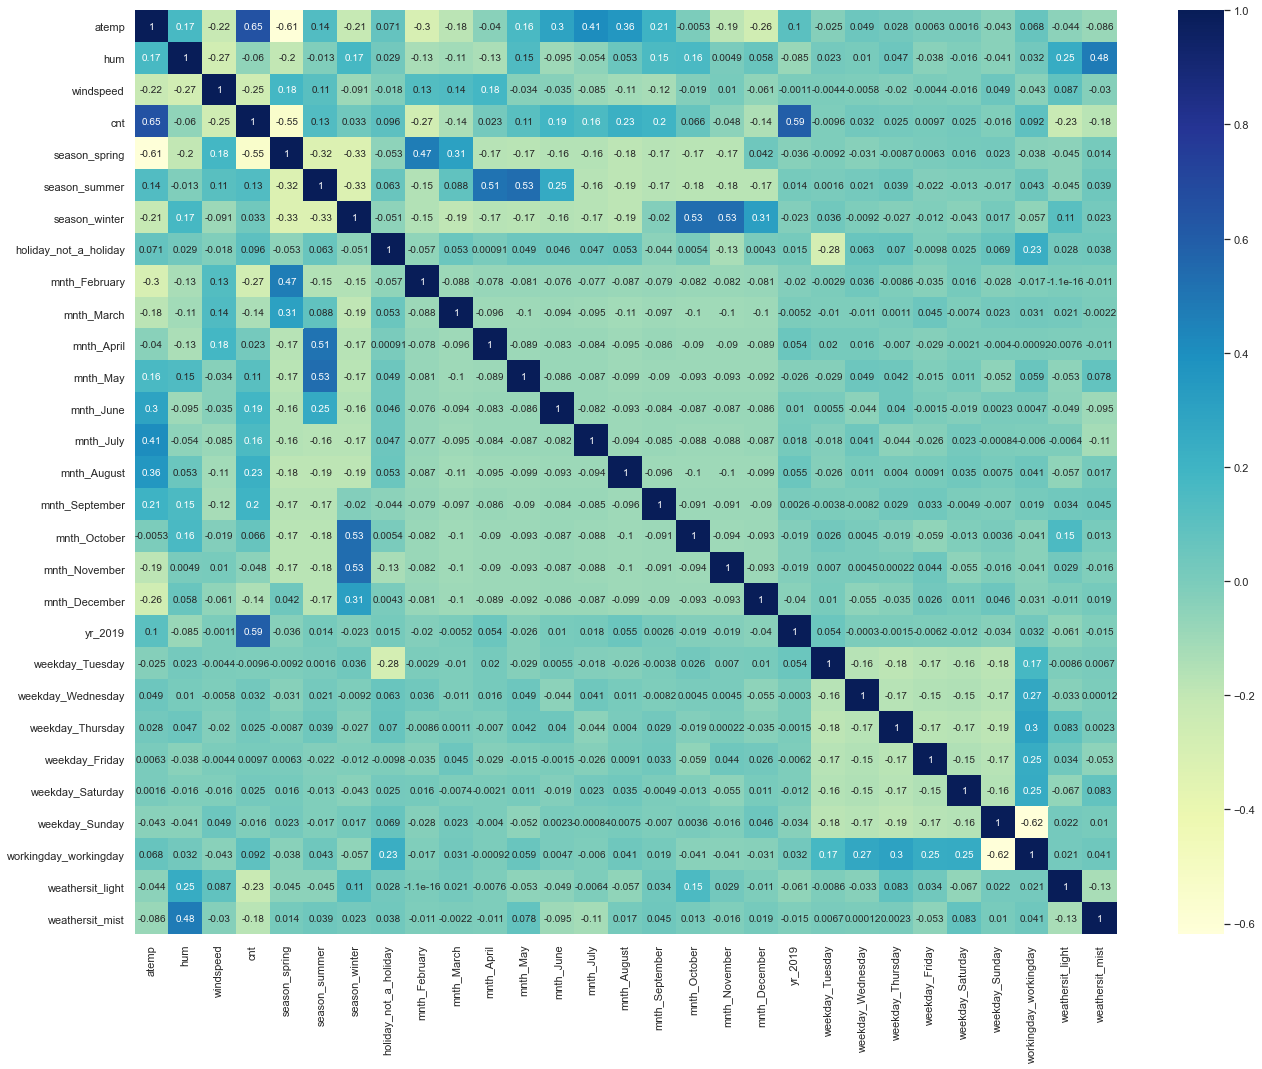

In [43]:
plt.figure(figsize = (22, 17))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- `atemp` have highest correlation with `cnt` i.e. 0.65.

### Dividing into X and Y sets for the model building

In [44]:
y_train = df_train.pop('cnt')
X_train = df_train

> # <font color=green>Step 4: Data Modelling and Evaluation</font>

__Running RFE(Recursive feature elimination) with the output number of the variable equal to `15`__

In [45]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('atemp', True, 1),
 ('hum', False, 7),
 ('windspeed', False, 5),
 ('season_spring', True, 1),
 ('season_summer', False, 6),
 ('season_winter', True, 1),
 ('holiday_not_a_holiday', True, 1),
 ('mnth_February', False, 4),
 ('mnth_March', True, 1),
 ('mnth_April', False, 2),
 ('mnth_May', True, 1),
 ('mnth_June', True, 1),
 ('mnth_July', False, 3),
 ('mnth_August', True, 1),
 ('mnth_September', True, 1),
 ('mnth_October', True, 1),
 ('mnth_November', False, 8),
 ('mnth_December', False, 9),
 ('yr_2019', True, 1),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 11),
 ('weekday_Thursday', False, 13),
 ('weekday_Friday', False, 14),
 ('weekday_Saturday', False, 12),
 ('weekday_Sunday', True, 1),
 ('workingday_workingday', True, 1),
 ('weathersit_light', True, 1),
 ('weathersit_mist', True, 1)]

In [47]:
col = X_train.columns[rfe.support_]
col

Index(['atemp', 'season_spring', 'season_winter', 'holiday_not_a_holiday',
       'mnth_March', 'mnth_May', 'mnth_June', 'mnth_August', 'mnth_September',
       'mnth_October', 'yr_2019', 'weekday_Sunday', 'workingday_workingday',
       'weathersit_light', 'weathersit_mist'],
      dtype='object')

In [48]:
X_train.columns[~rfe.support_]

Index(['hum', 'windspeed', 'season_summer', 'mnth_February', 'mnth_April',
       'mnth_July', 'mnth_November', 'mnth_December', 'weekday_Tuesday',
       'weekday_Wednesday', 'weekday_Thursday', 'weekday_Friday',
       'weekday_Saturday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [49]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [50]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [51]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [52]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.55e-180
Time:                        12:23:34   Log-Likelihood:                -268.15
No. Observations:                 510   AIC:                             568.3
Df Residuals:                     494   BIC:                             636.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.82

- `holiday_not_a_holiday` have p-value greater than 0.05 so we'll drop it.

### Dropping the variable and updating the model

In [53]:
# Dropping 'holiday_not_a_holiday'

X = X_train_rfe.drop('holiday_not_a_holiday', 1)

In [54]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [55]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.02e-181
Time:                        12:23:34   Log-Likelihood:                -269.45
No. Observations:                 510   AIC:                             568.9
Df Residuals:                     495   BIC:                             632.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.64

- All the variables have p-values less than 0.05 thus this is out final model.Now, let's check the VIFs of the variables.

In [56]:
X_train_new = X_train_lm.drop(['const'], axis=1)
X_train_new.columns

Index(['atemp', 'season_spring', 'season_winter', 'mnth_March', 'mnth_May',
       'mnth_June', 'mnth_August', 'mnth_September', 'mnth_October', 'yr_2019',
       'weekday_Sunday', 'workingday_workingday', 'weathersit_light',
       'weathersit_mist'],
      dtype='object')

__Calculating VIFs for the new model__

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,workingday_workingday,3.21
1,season_spring,2.79
0,atemp,2.74
2,season_winter,2.59
9,yr_2019,1.89
8,mnth_October,1.66
13,weathersit_mist,1.57
6,mnth_August,1.55
10,weekday_Sunday,1.49
5,mnth_June,1.36


- VIFs of all the variables is less than 5 so we can keep them.

## Residual Analysis of the train data

In [58]:
y_train_cnt = lr_2.predict(X_train_lm)

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

Text(0.5, 0, 'Errors')

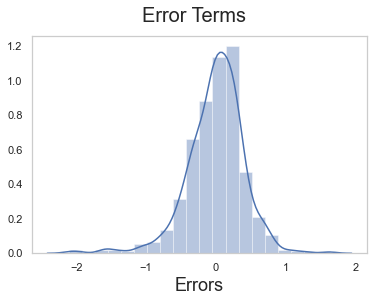

In [59]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

- Error terms are almost `normally distributed with mean zero`.

#### Residual Analysis for Indepence & Equal Variance

Text(0, 0.5, 'Residual')

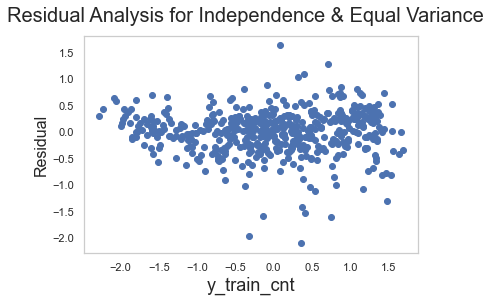

In [60]:
fig = plt.figure()
plt.scatter(y_train_cnt,y_train - y_train_cnt)
fig.suptitle('Residual Analysis for Independence & Equal Variance', fontsize=20)              # Plot heading 
plt.xlabel('y_train_cnt', fontsize=18)                          # X-label
plt.ylabel('Residual', fontsize=16)                          # Y-label

- Error terms does not follow any pattern.Thus, they are independent of each other.
- Error terms have almost constant variance(homoscedasticity)

## Making Predictions

#### Applying the scaling on the test sets

In [61]:
num_vars =['cnt', 'atemp','hum', 'windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [62]:
y_test = df_test.pop('cnt')
X_test = df_test

In [63]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [64]:
X_train_new.columns

Index(['atemp', 'season_spring', 'season_winter', 'mnth_March', 'mnth_May',
       'mnth_June', 'mnth_August', 'mnth_September', 'mnth_October', 'yr_2019',
       'weekday_Sunday', 'workingday_workingday', 'weathersit_light',
       'weathersit_mist'],
      dtype='object')

In [65]:
# Making predictions
y_pred = lr_2.predict(X_test_new)

__Calculating adjusted R squared and other metrics for test data.__

In [66]:
from sklearn import metrics

mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
mae=metrics.mean_absolute_error(y_test,y_pred)
adj_r2 = (1 - (1 - r2) * ((X_test_new.shape[0] - 1) / (X_test_new.shape[0] - X_test_new.shape[1] - 1)))
print('Mean Squared Error:',mse)
print('R squared:',r2)
print('Adjusted R Squared:',adj_r2)
print('Mean Absolute Error:',mae)

Mean Squared Error: 0.16339440801159866
R squared: 0.8268109871196292
Adjusted R Squared: 0.8140137694191092
Mean Absolute Error: 0.30465988058875215


## Model Evaluation

Text(0, 0.5, 'y_pred')

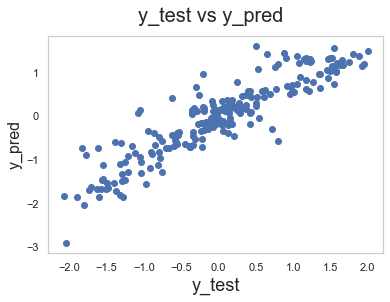

In [67]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

- Clearly there is linear relationship between actual and predicted value. Thus, model is performing quite well.

## Final model

- Adjusted R- Square for __train data: `82.7%`__
- Adjusted R- Square for __test data: `81.4%`__

We can see that the equation of our best fitted line is:

__<i>cnt = -0.6496 + 0.3844  *  atemp- 0.5057 * season_spring +0.2445  * season_winter + 0.1935 * mnth_March+ 0.2880 * mnth_May+ 0.2155 * mnth_June+ 0.2112 * mnth_August+ 0.4775 * mnth_September+ 0.2195 * mnth_October+1.0566  * yr_2019+ 0.2789 * weekday_Sunday+ 0.2406 * workingday_workingday-1.3644  * weathersit_light-0.3722 * weathersit_mist</i>__

__Top 14 variables contributing in model to predict the number of bikes rented are:__
- atemp
- season_spring 
- season_winter 
- mnth_March
- mnth_May
- mnth_June
- mnth_August
- mnth_September
- mnth_October
- yr_2019
- weekday_Sunday
- workingday_workingday
- weathersit_light
- weathersit_mist


__<i>We can conclude that temperature, weather, season, month of the year are the main deciding factors for bike rental by people.</i>__
